# Loading and Wrangling Data with Pandas and NumPy


Data sources come in many formats: plain text files, CSVs, SQL databases, Excel files, and many more. Python that takes the cake when it comes to data preparation: pandas. The pandas library is a core tool for a data scientist, and we will learn how to use it effectively in this chapter. 

In [1]:
# Import the Pandas Library

import pandas as pd

track_df = pd.read_csv(r'data\itunes_data.csv')

# Preview the first 5 rows of the dataframe
track_df.head()

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,NaN,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


> Note that big data can indeed be handled in pandas. One method is using the chunksize argument in read_csv to read a chunk of the data at a time. A few Python packages that can also help with reading big data in pandas are dask and modin, which can utilize clusters of computers (for example, on AWS or GCP cloud resources).

## Reading Excel Files

The function call to read_excel is similar to read_csv, except we are providing an engine (library) to read the **excel** data with.

In [2]:
import openpyxl

excel_df = pd.read_excel(r'data\itunes_data_xl.xlsx', engine = 'openpyxl')

excel_df.head()

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,NaN,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


## Reading Database Tables

Let's get the full data from the chinook SQLite database. Pandas has a few methods for loading from SQL, but we'll use the pd.read_sql_query() function. First, we need to create our engine that will connect to our database with SQLAlchemy.

In [3]:
from sqlalchemy import create_engine

# Create the engine
engine = create_engine(r'sqlite:///C:\Users\INNO\Documents\Python Development\Practical Data Science\data\chinook.db')


# Create the query
query = """ SELECT 
            tracks.name as Track,
            tracks.composer,
            tracks.bytes,
            tracks.unitprice,
            genres.name as Genre,
            albums.title as Album,
            artists.name as Artist
            FROM tracks
            JOIN genres ON tracks.genreid = genres.genreid
            JOIN albums ON tracks.albumid = albums.albumid
            JOIN artists ON albums.artistid = artists.artistid;
        """

with engine.connect() as connection:
    sql_df = pd.read_sql_query(query, connection)
    
sql_df.head()    

,Track,Composer,Bytes,UnitPrice,Genre,Album,Artist
0,For Those About To Rock (We Salute You),"Angus Young, Malcolm Young, Brian Johnson",11170334,0.99,Rock,For Those About To Rock We Salute You,AC/DC
1,Put The Finger On You,"Angus Young, Malcolm Young, Brian Johnson",6713451,0.99,Rock,For Those About To Rock We Salute You,AC/DC
2,Let's Get It Up,"Angus Young, Malcolm Young, Brian Johnson",7636561,0.99,Rock,For Those About To Rock We Salute You,AC/DC
3,Inject The Venom,"Angus Young, Malcolm Young, Brian Johnson",6852860,0.99,Rock,For Those About To Rock We Salute You,AC/DC
4,Snowballed,"Angus Young, Malcolm Young, Brian Johnson",6599424,0.99,Rock,For Those About To Rock We Salute You,AC/DC


Note that pandas has methods for loading data from several sources: CSV, JSON, Excel, and even URLs. You can find a list of all the available methods in the documentation here: https://pandas.pydata.org/pandas-docs/stable/reference/io.html



In [4]:
# If we have lists/dictionary

df = pd.DataFrame(data = 
                 {'seconds': [1, 2, 3, 4],
                  'intensity': [121, 45, 98, 12]}
                  )

df

,seconds,intensity
0,1,121
1,2,45
2,3,98
3,4,12


## Working with DataFrames

In [5]:
# Join multiple dataframes using the concat method
itunes_df = pd.concat([sql_df, excel_df, track_df])

itunes_df.head()

,Track,Composer,Bytes,UnitPrice,Genre,Album,Artist,TrackId,Name,AlbumId,MediaTypeId,GenreId,Milliseconds
0,For Those About To Rock (We Salute You),"Angus Young, Malcolm Young, Brian Johnson",11170334,0.99,Rock,For Those About To Rock We Salute You,AC/DC,NaN,NaN,NaN,NaN,NaN,NaN
1,Put The Finger On You,"Angus Young, Malcolm Young, Brian Johnson",6713451,0.99,Rock,For Those About To Rock We Salute You,AC/DC,NaN,NaN,NaN,NaN,NaN,NaN
2,Let's Get It Up,"Angus Young, Malcolm Young, Brian Johnson",7636561,0.99,Rock,For Those About To Rock We Salute You,AC/DC,NaN,NaN,NaN,NaN,NaN,NaN
3,Inject The Venom,"Angus Young, Malcolm Young, Brian Johnson",6852860,0.99,Rock,For Those About To Rock We Salute You,AC/DC,NaN,NaN,NaN,NaN,NaN,NaN
4,Snowballed,"Angus Young, Malcolm Young, Brian Johnson",6599424,0.99,Rock,For Those About To Rock We Salute You,AC/DC,NaN,NaN,NaN,NaN,NaN,NaN


> The concat method by default stacks the rows on top of eachother  

Here, we set axis=1 to tell the function to join along the columns, not rows. We also set the join parameter to inner so that only rows with a matching index are joined.

pd.merge() is another function that can be used to merge data, such as a SQL join. With merge(), we can join on any column rather than just the index. The official online pandas documentation on merge details the available arguments and shows examples: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html. Other merging methods are described in the documentation here: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

## Exploratory Data Analysis and Data Cleaning with Pandas



In [6]:
# Look at the tail of the data
itunes_df.tail()

,Track,Composer,Bytes,UnitPrice,Genre,Album,Artist,TrackId,Name,AlbumId,MediaTypeId,GenreId,Milliseconds
3498,NaN,NaN,4718950,0.99,NaN,NaN,NaN,3499.0,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343.0,2.0,24.0,286741.0
3499,NaN,Franz Schubert,2283131,0.99,NaN,NaN,NaN,3500.0,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344.0,2.0,24.0,139200.0
3500,NaN,Claudio Monteverdi,1189062,0.99,NaN,NaN,NaN,3501.0,"L'orfeo, Act 3, Sinfonia (Orchestra)",345.0,2.0,24.0,66639.0
3501,NaN,Wolfgang Amadeus Mozart,3665114,0.99,NaN,NaN,NaN,3502.0,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346.0,2.0,24.0,221331.0
3502,NaN,Philip Glass,3305164,0.99,NaN,NaN,NaN,3503.0,Koyaanisqatsi,347.0,2.0,10.0,206005.0


In [7]:
# Indexing with loc
itunes_df.loc[3502]

,Track,Composer,Bytes,UnitPrice,Genre,Album,Artist,TrackId,Name,AlbumId,MediaTypeId,GenreId,Milliseconds
3502,Koyaanisqatsi,Philip Glass,3305164,0.99,Soundtrack,Koyaanisqatsi (Soundtrack from the Motion Pict...,Philip Glass Ensemble,NaN,NaN,NaN,NaN,NaN,NaN
3502,NaN,Philip Glass,3305164,0.99,NaN,NaN,NaN,3503.0,Koyaanisqatsi,347.0,2.0,10.0,206005.0
3502,NaN,Philip Glass,3305164,0.99,NaN,NaN,NaN,3503.0,Koyaanisqatsi,347.0,2.0,10.0,206005.0


In [8]:
# Copy a dataframe

test_df = itunes_df.copy()


# Determine the shape of the df
test_df.shape

(10509, 13)

In [9]:
# Looking for null values and data types
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10509 entries, 0 to 3502
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Track         3503 non-null   object 
 1   Composer      7575 non-null   object 
 2   Bytes         10509 non-null  int64  
 3   UnitPrice     10509 non-null  float64
 4   Genre         3503 non-null   object 
 5   Album         3503 non-null   object 
 6   Artist        3503 non-null   object 
 7   TrackId       7006 non-null   float64
 8   Name          7006 non-null   object 
 9   AlbumId       7006 non-null   float64
 10  MediaTypeId   7006 non-null   float64
 11  GenreId       7006 non-null   float64
 12  Milliseconds  7006 non-null   float64
dtypes: float64(6), int64(1), object(6)
memory usage: 1.4+ MB


The info method also shows us the non-null values. As long as this matches the number of rows, it means there are no missing values. However, it's easier to look at the number of missing values with this:

In [10]:
# Count the null values
itunes_df.isna().sum()

Track           7006
Composer        2934
Bytes              0
UnitPrice          0
Genre           7006
Album           7006
Artist          7006
TrackId         3503
Name            3503
AlbumId         3503
MediaTypeId     3503
GenreId         3503
Milliseconds    3503
dtype: int64

### INVESTIGATING STATISTICAL PROPERTIES OF THE DATA

In [11]:
itunes_df.describe()

,Bytes,UnitPrice,TrackId,AlbumId,MediaTypeId,GenreId,Milliseconds
count,1.050900e+04,10509.000000,7006.000000,7006.000000,7006.000000,7006.000000,7.006000e+03
mean,3.351021e+07,1.050805,1752.000000,140.929489,1.208393,5.725378,3.935992e+05
std,1.053825e+08,0.238984,1011.301132,81.769558,0.580402,6.189762,5.349672e+05
min,3.874700e+04,0.990000,1.000000,1.000000,1.000000,1.000000,1.071000e+03
25%,6.342021e+06,0.990000,876.250000,70.250000,1.000000,1.000000,2.072550e+05
50%,8.107896e+06,0.990000,1752.000000,141.000000,1.000000,3.000000,2.556340e+05
75%,1.026757e+07,0.990000,2627.750000,212.000000,1.000000,7.000000,3.216580e+05
max,1.059546e+09,1.990000,3503.000000,347.000000,5.000000,25.000000,5.286953e+06


This shows a summary of a few statistics, including the number of non-missing (non-NA) values (count), the average (mean), the standard deviation (std), the minimum and maximum, and a few percentiles

In [12]:
# Value counts for GenreID

itunes_df['GenreId'].value_counts()

1.0     2594
7.0     1158
3.0      748
4.0      664
2.0      260
19.0     186
6.0      162
24.0     148
21.0     128
14.0     122
8.0      116
9.0       96
10.0      86
23.0      80
17.0      70
15.0      60
13.0      56
16.0      56
20.0      52
12.0      48
22.0      34
11.0      30
18.0      26
5.0       24
25.0       2
Name: GenreId, dtype: int64

In [13]:
# How many unique Gender Items
itunes_df['GenreId'].unique().shape

(26,)

The unique() function will return an array of all unique values. We then use the shape attribute to see how many values there are. In this case, we find there are 204 unique artists in the data.

In [14]:
# Correlations
itunes_df.corr()

,Bytes,UnitPrice,TrackId,AlbumId,MediaTypeId,GenreId,Milliseconds
Bytes,1.000000,0.938482,0.301285,0.281840,0.732825,0.544109,0.960181
UnitPrice,0.938482,1.000000,0.327255,0.307469,0.785483,0.582779,0.931796
TrackId,0.301285,0.327255,1.000000,0.990699,0.449970,0.366996,0.293320
AlbumId,0.281840,0.307469,0.990699,1.000000,0.451335,0.382107,0.274891
MediaTypeId,0.732825,0.785483,0.449970,0.451335,1.000000,0.661570,0.735500
GenreId,0.544109,0.582779,0.366996,0.382107,0.661570,1.000000,0.524484
Milliseconds,0.960181,0.931796,0.293320,0.274891,0.735500,0.524484,1.000000


This calculation is Pearson correlation, which measures how linearly correlated two datasets are. It ranges from -1 (inverse correlation; variable 1 increases proportionally when variable 2 decreases) to 0 (no correlation) to 1 (perfectly linear correlation; variable 1 increases proportionally when variable 2 increases). So, the correlation between a single numeric data column and itself is 1 by definition – if we plotted a dataset against itself, it would be a straight, diagonal line. We can see from our data that all of our numeric data is strongly linearly correlated, which makes sense. Longer songs are larger in data storage size (bytes) and cost more. Roughly speaking, we can break up correlation strengths into sections of 0.2. So, 0-0.2 is very weakly correlated, 0.2-0.4 is weak, 0.4-0.6 signifies medium correlation, 0.6-0.8 is strong, and 0.8-1 is very strongly correlated. This is only for data with linear relationships. In other words, a scatter plot of two variables should resemble a straight line. If your data has non-linear relationships, then Pearson correlations are not the best method to use. We will learn other correlation methods for non-linear relationships later, such as Phik correlation.

## Plotting with DataFrames

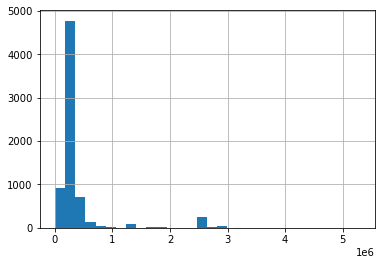

In [15]:
import matplotlib.pyplot as plt

# Plotting a histogram
itunes_df['Milliseconds'].hist(bins=30)

# Show the plot
plt.show()

The first line selects the Milliseconds column, and uses the hist() method of pandas Series objects. We set the option bins=30 to increase it from the default of 10 – this specifies how many bars the histogram is broken up into. Then we use the plt.show() command to display the plot. In Jupyter Notebook, this is not necessary, but in an IPython shell or Python .py file, we need to call plt.show() to display the plot on the screen.

We see that most of our songs have a shorter song length, but there are some outliers with very long lengths. The x-axis scale has 1e6, meaning the numbers are multiplied by 1*106, or 1 million. From our describe() function earlier, we found our 50th percentile of song length (the median) is around 200,000 ms, or 200 s. This seems right, as most songs are around 3 minutes long.

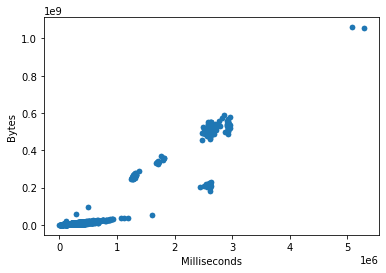

In [16]:
# Scatter plots

itunes_df.plot.scatter(x='Milliseconds', y='Bytes')

# Show Plot
plt.show()

Notice we are using plot.scatter here instead of just scatter. The hist function can also be called with plot.hist as we did, but sometimes we are required to put plot before the plotting function in pandas as with scatter.

Notice we have 1e9 on the upper-left side, meaning the Bytes values should be multiplied by 1,000,000,000, and we have 1e6 on the lower-right side, signifying the Milliseconds values should be multiplied by 1,000,000. We can see from the plot there are some groups of data – two groups follow roughly straight lines at different slopes. Within the steeper line, we see at least three groups of data. Then there is another group of data around 2.5*106 ms and 0.2e9 bytes. Finally, one group resides with a long song length and large file size (in the upper-right part of the plot). We will revisit some of these groups soon and examine these groups in more detail.

<AxesSubplot:>

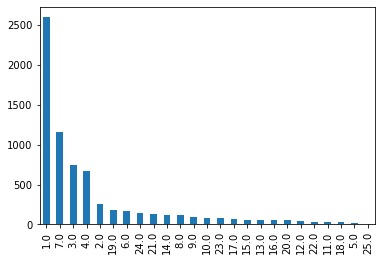

In [17]:
# Bar plots
itunes_df['GenreId'].value_counts().plot.bar()

## Cleaning Data

After we've completed some EDA, we can then move on to some other cleaning steps. Some surveys have found data scientists spend anywhere between 25% and 75% of their time cleaning data. Quite often, we can carry out most or all of our data cleaning with pandas. Some common data cleaning steps include:
- Removing Irrelevant Data
- Dealing with missing values
- Dealing with outliers
- Dealing with Duplicate values
- Ensuring Data Types are correct
- Standardizing data formats

### Removing Irrelevant Data

This involves dropping columns or rows we don't want. For example, with our iTunes data, we may not really need the Composer column. We could drop this column like so:

In [18]:
# Drop the Composer Column
itunes_df.drop('Composer', axis=1, inplace=True)

itunes_df.columns

Index(['Track', 'Bytes', 'UnitPrice', 'Genre', 'Album', 'Artist', 'TrackId',
       'Name', 'AlbumId', 'MediaTypeId', 'GenreId', 'Milliseconds'],
      dtype='object')

We use the drop function of DataFrames, giving the column name as the first argument. We can drop multiple columns at once by supplying a list. The axis=1 argument specifies to drop a column, not a row, and inplace=True changes the DataFrame itself instead of returning a new, modified DataFrame. Then we examine the remaining columns with the columns attribute of our DataFrame.

In [19]:
# Create a new df with records NOT including GenreID [17.0, 15.0, 13.0, 16.0, 20.0, 12.0, 22.0, 11.0, 18.0, 5.0, 25.0]
specific_genreid = itunes_df.loc[(~itunes_df['GenreId'].isin([17.0, 15.0, 13.0, 16.0, 20.0, 12.0, 22.0, 11.0, 18.0, 5.0, 25.0]))]

# Check the GenreIds in the new dataframe
specific_genreid['GenreId'].unique()

array([nan,  1.,  2.,  3.,  4.,  6.,  7.,  8.,  9., 10., 14., 19., 21.,
       23., 24.])

This uses filtering with the isin method. The isin method checks if each value is in the list or set provided to the function. In this case, we also negate this condition with the tilde (~) so that any of the non-music genres are excluded.

### Dealing with Missing Values

Missing values arise all the time in datasets. Often, they are represented as NA or NaN values. Other times, missing values may be represented by certain numbers or values, such as None or -999. It helps to examine the data with EDA and check any documentation on the data to see if missing values are represented in a special way. We can fill in missing values, which is also called imputation. In terms of dealing with missing values, we have some options:

- Leave the missing values as-is
- Drop the data
- Fill with a specific value
- Replace with the mean, median, or mode
- Use machine learning to replace missing values

The best option for you depends on the situation and the data itself. For example, we saw that our Name column has several missing values. We can use filtering to see what some of these rows look like:

In [20]:
itunes_df.loc[(itunes_df['Name'].isna())].sample(5, random_state = 42).head()

,Track,Bytes,UnitPrice,Genre,Album,Artist,TrackId,Name,AlbumId,MediaTypeId,GenreId,Milliseconds
3150,Mulher Carioca,6395048,0.99,Latin,Vinicius De Moraes,Vinícius De Moraes,NaN,NaN,NaN,NaN,NaN,NaN
315,A Estrada,9344477,0.99,Reggae,Cidade Negra - Hits,Cidade Negra,NaN,NaN,NaN,NaN,NaN,NaN
2178,Theme From The Swan,6638076,0.99,Soundtrack,Original Soundtracks 1,Passengers,NaN,NaN,NaN,NaN,NaN,NaN
2772,Música No Ar,5184891,0.99,Latin,Serie Sem Limite (Disc 1),Tim Maia,NaN,NaN,NaN,NaN,NaN,NaN
430,Tuesday's Gone,17900787,0.99,Metal,Garage Inc. (Disc 1),Metallica,NaN,NaN,NaN,NaN,NaN,NaN


Here, we take a random sample of 5 datapoints with sample(), giving it a random_state so the results are the same every time we run it. Then we look at a few rows with head(). In this case, we get results from all sorts of genres – TV shows, latin, and so on. 

In [21]:
# We can drop all missing values with the following
#itunes_df.dropna(inplace=True)

The dropna function has several other parameters (options), but we are simply specifying that it should modify the existing DataFrame with inplace=True. By default, this drops any rows with at least one missing value.

If we were trying to do another type of machine learning, like clustering, we might want to fill the missing values with a specific value

In [22]:
# Fill the unknown names with the famous name "Marvin"
itunes_df.loc[(itunes_df['Name'].isna()), ['Name']] = 'Marvin'

itunes_df['Name'].head()

0    Marvin
1    Marvin
2    Marvin
3    Marvin
4    Marvin
Name: Name, dtype: object

In [23]:
# The above can also be done as
itunes_df['Name'].fillna('Marvin', inplace=True)

Let's say instead we wanted to fill missing values with the mode, which is the most common value for a series of data. This could make sense if we have a dataset where most of the values are a particular value, such as with the UnitPrice column. In our case, 94% of the values are 0.99 for UnitPrice, so filling with the mode would make sense there. Filling with the mode can be done similarly as we did above, except using the mode function:

In [24]:
# Fill the Unit Price null values with the mode
itunes_df['UnitPrice'].fillna(itunes_df['UnitPrice'].mode(), inplace=True)



In other cases, we may want to fill with the mean (average). This makes sense if we have a distribution of values that is somewhat Gaussian or a normal distribution, meaning it follows a bell curve shape. Instead of using mode, we can use mean. In other cases, it makes more sense to use the median (the 50th percentile), which means using something like df['Column'].median(). The median is best when we have a skewed distribution.

The most advanced method of replacing missing values is using machine learning. We can use the machine learning techniques that we will learn later in the book to predict missing values for each row and fill them in. Another option is using a pre-built imputer function, like the sklearn.impute.KNNImputer function, which accomplishes the same thing. Usually, replacing with the mean, median, or mode (or even a constant value such as 0) is good enough to start, but KNN (k-nearest neighbors) imputation works well (but requires more effort).

An example where KNN imputation can work is demographic data. KNN works by taking a certain number, n, of the closest datapoints, and averages them to get new values. It gets the nearest points by Euclidean distance, which is a straight line between two points in space.

In [25]:
itunes_df.head()

,Track,Bytes,UnitPrice,Genre,Album,Artist,TrackId,Name,AlbumId,MediaTypeId,GenreId,Milliseconds
0,For Those About To Rock (We Salute You),11170334,0.99,Rock,For Those About To Rock We Salute You,AC/DC,NaN,Marvin,NaN,NaN,NaN,NaN
1,Put The Finger On You,6713451,0.99,Rock,For Those About To Rock We Salute You,AC/DC,NaN,Marvin,NaN,NaN,NaN,NaN
2,Let's Get It Up,7636561,0.99,Rock,For Those About To Rock We Salute You,AC/DC,NaN,Marvin,NaN,NaN,NaN,NaN
3,Inject The Venom,6852860,0.99,Rock,For Those About To Rock We Salute You,AC/DC,NaN,Marvin,NaN,NaN,NaN,NaN
4,Snowballed,6599424,0.99,Rock,For Those About To Rock We Salute You,AC/DC,NaN,Marvin,NaN,NaN,NaN,NaN


In [26]:
import numpy as np

from sklearn.impute import KNNImputer

# Set the first row in the Bytes cilumn to null
itunes_df.loc[0, 'Bytes'] = np.nan

# Set the KNN imputer
imputer = KNNImputer()

# Leave the imputation with the standard k = 5 on the columns below
imputed = imputer.fit_transform(itunes_df[['Milliseconds', 'Bytes', 'UnitPrice']])


# Replace the missing values in the Bytes column
itunes_df['Bytes'] = imputed[:, 1]


# Display the imputed variable
itunes_df.head()

,Track,Bytes,UnitPrice,Genre,Album,Artist,TrackId,Name,AlbumId,MediaTypeId,GenreId,Milliseconds
0,For Those About To Rock (We Salute You),4552443.4,0.99,Rock,For Those About To Rock We Salute You,AC/DC,NaN,Marvin,NaN,NaN,NaN,NaN
1,Put The Finger On You,6713451.0,0.99,Rock,For Those About To Rock We Salute You,AC/DC,NaN,Marvin,NaN,NaN,NaN,NaN
2,Let's Get It Up,7636561.0,0.99,Rock,For Those About To Rock We Salute You,AC/DC,NaN,Marvin,NaN,NaN,NaN,NaN
3,Inject The Venom,6852860.0,0.99,Rock,For Those About To Rock We Salute You,AC/DC,NaN,Marvin,NaN,NaN,NaN,NaN
4,Snowballed,6599424.0,0.99,Rock,For Those About To Rock We Salute You,AC/DC,NaN,Marvin,NaN,NaN,NaN,NaN


This takes in data with missing values, fits a KNN model, and then fills in the missing values with predictions from the model. Unfortunately, sklearn can only handle numeric data without missing values, so we can't pass it any strings. Then, to replace our missing values, we overwrite the Bytes column with our new data:

> imputed = imputer.fit_transform(itunes_df[['Milliseconds','Bytes', 'UnitPrice']])

The imputed variable is a NumPy array, which is like a pandas Series. We are indexing it with [:, 1], which means retrieving all rows and the second column. If we examine the prediction for the missing value compared with the original value, it's close but not perfect. Our predicted value from KNNImputer for the first row with an Index value of 0 (there are a few rows with an Index value of 0) is 4.5e6, but the actual original value was 11.17e6 before we set it to np.nan. However, the KNNImputer prediction is much closer than the mean value for Bytes of 33.51021e6, which is an order of magnitude larger than the actual value. So, the KNNImputer method does a much better job of filling in missing values compared with using the mean for data that has a very wide distribution or is not close to a Gaussian distribution.

### Dealing with Outliers

Outliers are data that are not in the usual range of values. For categorical data, such as the genres, these may be some of the minority classes, like TV shows. We could remove these rows with filtering, or we could also group all minority classes into a class we label as Other. Dealing with categorical outliers can help a little with analysis, but often has a minimal impact.

For numeric data, it's easy to quantify an outlier. Typically, we use interquartile range (IQR) or z-score methods. We will cover the IQR method here, since it relates to boxplots, which we will cover in the next chapter.

Recall that we get quartiles (25th, 50th, 75th percentiles) from the describe() function in our EDA. These are sometimes called the first, second, and third quartiles, respectively (Q1, Q2, and Q3).

> IQR = 75th_Percentile - 25th_Percentile

**Upper_Boundary  = 75th_Percentile + 1.5 * IQR**

  
 **Lower_Boundary  = 75th_Percentile - 1.5 * IQR**

In [27]:
# Removing Outliers

def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    upper_boundary = q3 + 1.5 * iqr
    lower_boundary = q1 - 1.5 * iqr
    new_df = df.loc[(df[column] > lower_boundary) & (df[column] < upper_boundary)]
    return new_df


Here, we have created a function that takes a DataFrame and column name as an argument. The first two lines calculate the 25th and 75th percentile levels with the quantile() method, and store them in the q1 and q3 variables. Then we calculate IQR from the difference between Q1 and Q3. Next, we get the upper and lower boundaries for outliers using the IQR outlier formulas. Then we use DataFrame filtering to only keep the points between the upper and lower boundaries (keeping only the non-outlier points). The result is stored in a new DataFrame, new_df. Finally, we return our DataFrame. We could use this with a numeric column like this:

In [28]:
itunes_df_clean = remove_outliers(df = itunes_df, column = 'Milliseconds')

itunes_df_clean.shape

(6292, 12)

> We can then use the shape attribute, itunes_df_clean.shape, to check that some rows were actually dropped. In this case, we excluded about 400 rows of data by removing the Milliseconds outliers.

Removing outliers can make it easier to visualize data and can improve the performance of machine learning models. Another easy way to remove outliers is to exclude any datapoints that lie outside of extreme percentiles in the data. For example, we could remove any points outside of the 1st and 99th percentiles, meaning we only keep the middle 98% of the data.

### Dealing with Duplicated Values

It's always a good idea to check for duplicate values, since they can creep into data in numerous ways. An easy way to check for duplicates is the duplicated() function:

> itunes_df.duplicated().sum()

In [29]:
# Check for duplicated values
itunes_df.duplicated().sum()

3226

In [30]:
# Now, lets frop the duplicates
itunes_df.drop_duplicates(inplace = True)

# View the shape of the dataframe
itunes_df.shape

(7283, 12)

## Ensuring Datatypes are Correct

Sometimes data will be loaded as an object datatype (string) instead of numeric if there are some non-numbers in that column. We want to use the df.info() function as we did before to check that our columns are the correct datatype, and then convert any columns that need it. For example, we could convert Milliseconds to an integer datatype like so:



In [31]:


itunes_df['Bytes'] = itunes_df['Bytes'].astype('int')


> Within the astype function, we can use strings such as 'float', 'int', or 'object', Python datatypes like int or float, or NumPy datatypes like np.int. For most work, we only need the datatypes object (for strings), int, and float.

### Standardizing Data Types

Sometimes we will have string data in several formats. This tends to happen when data is entered by hand. For example, some people may capitalize gender like "Male," "Female," or "Nonbinary," while others may leave it lowercased. Some people may only use a one-letter abbreviation, like "M." Cleaning this sort of data often means using DataFrame filtering, loc indexing, and string methods to replace values. We will cover this in the next section.

In [32]:
# Create a new column called lin_byte_ratio
itunes_df['len_byte_ratio'] = itunes_df['Milliseconds'] / itunes_df['Bytes']

# Preview new df
itunes_df.head()

,Track,Bytes,UnitPrice,Genre,Album,Artist,TrackId,Name,AlbumId,MediaTypeId,GenreId,Milliseconds,len_byte_ratio
0,For Those About To Rock (We Salute You),4552443,0.99,Rock,For Those About To Rock We Salute You,AC/DC,NaN,Marvin,NaN,NaN,NaN,NaN,NaN
1,Put The Finger On You,6713451,0.99,Rock,For Those About To Rock We Salute You,AC/DC,NaN,Marvin,NaN,NaN,NaN,NaN,NaN
2,Let's Get It Up,7636561,0.99,Rock,For Those About To Rock We Salute You,AC/DC,NaN,Marvin,NaN,NaN,NaN,NaN,NaN
3,Inject The Venom,6852860,0.99,Rock,For Those About To Rock We Salute You,AC/DC,NaN,Marvin,NaN,NaN,NaN,NaN,NaN
4,Snowballed,6599424,0.99,Rock,For Those About To Rock We Salute You,AC/DC,NaN,Marvin,NaN,NaN,NaN,NaN,NaN


### Using replace, map and apply to clean and transform data

A handy way to replace several values at once is with the map and replace functions. For example, we can replace variations of genres in our iTunes data like so:



In [33]:
# Load the genre_id csv

genre_df = pd.read_csv(r'data\genreid_to_name.csv')

genre_df.head()

,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll


In [34]:
# Convert the genre_df to a dictionary
genre_dict = dict(zip(genre_df['GenreId'], genre_df['Name']))

# View the dictionary
genre_dict

{1: 'Rock',
 2: 'Jazz',
 3: 'Metal',
 4: 'Alternative & Punk',
 5: 'Rock And Roll',
 6: 'Blues',
 7: 'Latin',
 8: 'Reggae',
 9: 'Pop',
 10: 'Soundtrack',
 11: 'Bossa Nova',
 12: 'Easy Listening',
 13: 'Heavy Metal',
 14: 'R&B/Soul',
 15: 'Electronica/Dance',
 16: 'World',
 17: 'Hip Hop/Rap',
 18: 'Science Fiction',
 19: 'TV Shows',
 20: 'Sci Fi & Fantasy',
 21: 'Drama',
 22: 'Comedy',
 23: 'Alternative',
 24: 'Classical',
 25: 'Opera'}

In [36]:
# Replace GenreID with the Genre Name
itunes_df['GenreId'] = itunes_df['GenreId'].replace(genre_dict)

itunes_df['GenreId'].value_counts()



Rock                  1322
Latin                  764
Metal                  374
Alternative & Punk     352
Jazz                   134
TV Shows                93
Classical               81
Blues                   81
Drama                   66
Reggae                  66
R&B/Soul                61
Pop                     50
Soundtrack              47
Alternative             40
World                   37
Hip Hop/Rap             37
Electronica/Dance       30
Heavy Metal             28
Sci Fi & Fantasy        26
Easy Listening          24
Bossa Nova              23
Comedy                  17
Science Fiction         13
Rock And Roll           12
Opera                    2
Name: GenreId, dtype: int64

First, we create a dictionary, where the keys are the existing values in the DataFrame, and the values are what should replace the existing values. In this case, we replace variations of the GenreId with Genre Name. In the second line, we select the Genre column, then use replace with our dictionary of replacement values. This returns a new pandas Series.

The replace function replaces any matching values it finds in the supplied dictionary, and one use case is replacing some (or all) of the values in a Series. Any values that are not in the dictionary passed to replace will be left alone. If we want any non-matching values in our provided conversion dictionary to be replaced with NaN instead, then we can use map. This makes it easy to check if any values were not converted to something new by checking for NaN values in the Series (for example, this can be useful in unit tests). The performance of map and replace are similar.

### Using GroupBy

One last useful tool we'll cover is groupby. This is just like in SQL – group by unique values in a column. For example, we can look at the average length of songs by genre, and sort them from least to greatest:

In [39]:
# Grouping By 'GenreId'
itunes_df.groupby('GenreId').mean()['Milliseconds'].sort_values().head()

GenreId
Rock And Roll     134643.500000
Opera             174813.000000
Hip Hop/Rap       178669.324324
Easy Listening    189164.208333
R&B/Soul          220066.852459
Name: Milliseconds, dtype: float64

First, we take our DataFrame, then use the groupby method. We supply the column name we want to group by, and then take the average, or mean.

This returns a pandas Series. We can then use the sort_values() method to sort from least to greatest. Finally, we use head() to get only the first five

## Writing DataFrames to disk

We first give the filename as an argument for to_csv, and then tell it to not write the index to the file with index=False. This filename would save the data as saved_itunes_data.csv in the directory named "data" within the same folder/directory where the code is being run.

There are many other ways to save data. Some others I like to use are HDF and feather. HDF and Parquet files offer compression, and HDF allows us to append to files and retrieve only parts of the data at a time (via the index). Feather files are nice because they are very fast, compressed, and were designed for passing data between R and Python. However, feather is not considered a good idea for longer-term storage because the format could change. One last option to consider is writing to an Excel file (df.to_excel(filename)) if the data needs to be shared with less technical colleagues.

There is a lot more on the advanced side of the pandas package – aggregations, working with temporal data, and reshaping data. To learn more about advanced pandas usage, consider Packt's Pandas 1.x Cookbook, by Matt Harrison and Theodore Petrou, which is highly rated.

In [40]:
itunes_df_clean.to_csv(r'data/saved_itunes_data.csv', index=False)

## EDA

You've started a new data science position at a solar cell installation company. They
have some solar cell and solar irradiation data in Excel files they want you to load,
clean, and analyze, and then deliver your results to the executive team and president.




In [17]:
from glob import glob
import pandas as pd

# Load all solar data provided
combined_df_list = []

for excel_file in glob(r"data\solar*"):
    print(f"Begin the Data Upload Process for {excel_file}")
    solar_df = pd.read_excel(excel_file)
    combined_df_list.append(solar_df)
    print(f"Done with the Data Upload process for {excel_file}")
    


Begin the Data Upload Process for data\solar_data_1.xlsx
Done with the Data Upload process for data\solar_data_1.xlsx
Begin the Data Upload Process for data\solar_data_2.xlsx
Done with the Data Upload process for data\solar_data_2.xlsx


In [18]:

# Now lets concatenate the 2 dataframes
solar_df = pd.concat(combined_df_list)

# Preview the DF
solar_df.head()

,state_name,number_of_panels_total,kw_total,kw_median,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,existing_installs_count
0,NaN,31,7.75,3.25,5209.464685,1.243764e+04,0.0
1,Alabama,58997532,14749383.00,9.75,12069.322656,1.896138e+10,549.0
2,Alaska,2179124,544781.00,7.25,6540.612622,4.664927e+08,83.0
3,Arizona,114697808,28674452.00,11.75,18974.796637,4.639329e+10,39553.0
4,Arkansas,28130196,7032549.00,9.75,12099.947974,8.941609e+09,238.0


In [19]:
# Lets see the shape of the data
solar_df.shape

(55, 7)

In [20]:
# Lets see measures of central tendency and measures of dispersion
solar_df.describe()

,number_of_panels_total,kw_total,kw_median,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,existing_installs_count
count,5.500000e+01,5.500000e+01,54.000000,54.000000,5.500000e+01,54.000000
mean,6.418217e+07,1.604554e+07,7.907407,9952.438422,2.078188e+10,12785.666667
std,9.028737e+07,2.257184e+07,1.963882,3390.644848,3.233178e+10,46522.857045
min,3.100000e+01,7.750000e+00,3.250000,5156.452783,1.243764e+04,0.000000
25%,1.704436e+07,4.261089e+06,6.750000,7350.628174,5.982309e+09,357.000000
50%,4.847139e+07,1.211785e+07,7.750000,9409.792603,1.481478e+10,1727.000000
75%,7.325589e+07,1.831397e+07,9.000000,11375.480533,2.074348e+10,5994.500000
max,5.310227e+08,1.327557e+08,13.000000,19004.649878,1.980163e+11,328899.000000


### Dealing with Missing Values

In [21]:
# Check for missing Values
solar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 33
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   state_name                  54 non-null     object 
 1   number_of_panels_total      55 non-null     int64  
 2   kw_total                    55 non-null     float64
 3   kw_median                   54 non-null     float64
 4   yearly_sunlight_kwh_median  54 non-null     float64
 5   yearly_sunlight_kwh_total   55 non-null     float64
 6   existing_installs_count     54 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.4+ KB


From the above, state name, kw_median, yearly_sunlight_kwh_median and existing_installs_count all have missing values. Lets deal with them

In [22]:
# Lets fill the missing values using different techniques
from sklearn.impute import KNNImputer

# For the kw_median, lets fill the missing value using the mean
solar_df.loc[(solar_df["kw_median"].isna()), ["kw_median"]] = solar_df["kw_median"].mean()


# For the yearly_sunlight_kwh_median, lets fill the missing value using the median
solar_df.loc[(solar_df["yearly_sunlight_kwh_median"].isna()), ['yearly_sunlight_kwh_median']] = solar_df["yearly_sunlight_kwh_median"].median()


# For the existing_installs_count, lets fill the missing value using the KNN
imputer = KNNImputer()

# Perform the imputation
imputed = imputer.fit_transform(solar_df[["existing_installs_count", "yearly_sunlight_kwh_median", "kw_median", "kw_total"]])

# Replace the missing value in the Bytes column
solar_df["existing_installs_count"] = imputed[:, 0]

# Confirm that the missing values have been replaced
solar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 33
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   state_name                  54 non-null     object 
 1   number_of_panels_total      55 non-null     int64  
 2   kw_total                    55 non-null     float64
 3   kw_median                   55 non-null     float64
 4   yearly_sunlight_kwh_median  55 non-null     float64
 5   yearly_sunlight_kwh_total   55 non-null     float64
 6   existing_installs_count     55 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.4+ KB


In [23]:
# What are the Unique states involved

solar_df["state_name"].unique()

array([nan, 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

### Checking for Outliers

array([[<AxesSubplot:title={'center':'number_of_panels_total'}>,
        <AxesSubplot:title={'center':'kw_total'}>],
       [<AxesSubplot:title={'center':'kw_median'}>,
        <AxesSubplot:title={'center':'yearly_sunlight_kwh_median'}>],
       [<AxesSubplot:title={'center':'yearly_sunlight_kwh_total'}>,
        <AxesSubplot:title={'center':'existing_installs_count'}>]],
      dtype=object)

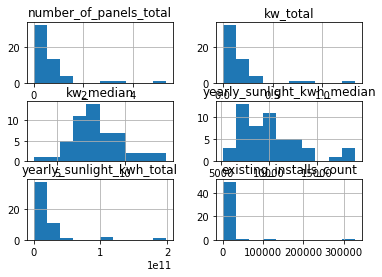

In [28]:
solar_df.hist()

### Checking for duplicated Values

In [26]:
# Checking for duplicated rows
solar_df.duplicated().sum()

3

In [ ]:
# Show the duplicated rows
solar_df[solar_df.duplicated(keep=False])

In [27]:
# Lets drop the duplicated values
solar_df.drop_duplicates(inplace=True)


# Check the shape
solar_df.shape

(52, 7)